In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-educational-data/Global_Education.csv


In [4]:
data = pd.read_csv("/kaggle/input/world-educational-data/Global_Education.csv",encoding='latin1')


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

Latitude    Longitude  OOSR_Pre0Primary_Age_Male  \
count  202.000000  202.000000                 202.000000   
mean    25.081422   55.166928                  19.658416   
std     16.813639   45.976287                  25.007604   
min      0.023559    0.824782                   0.000000   
25%     11.685062   18.665678                   0.000000   
50%     21.207861   43.518091                   9.000000   
75%     39.901792   77.684945                  31.000000   
max     64.963051  178.065032                  96.000000   

       OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
count                   202.000000             202.000000   
mean                     19.282178               5.282178   
std                      25.171147               9.396442   
min                       0.000000               0.000000   
25%                       0.000000               0.000000   
50%                       7.000000               1.000000   
75%                      30.000000               6.000000   
max                      96.000000              58.000000   

       OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male  \
count               202.000000                     202.000000   
mean                  5.569307                       8.707921   
std                  10.383092                      13.258203   
min                   0.000000                       0.000000   
25%                   0.000000                       0.000000   
50%                   1.000000                       2.000000   
75%                   6.750000                      12.750000   
max                  67.000000                      61.000000   

       OOSR_Lower_Secondary_Age_Female  OOSR_Upper_Secondary_Age_Male  \
count                       202.000000                     202.000000   
mean                          8.831683                      20.292079   
std                          14.724717                      21.485592   
min                           0.000000                       0.000000   
25%                           0.000000                       0.250000   
50%                           2.000000                      15.000000   
75%                          10.750000                      32.750000   
max                          70.000000                      84.000000   

       OOSR_Upper_Secondary_Age_Female  ...  Primary_End_Proficiency_Reading  \
count                       202.000000  ...                       202.000000   
mean                         19.975248  ...                        10.717822   
std                          23.140376  ...                        24.866101   
min                           0.000000  ...                         0.000000   
25%                           0.250000  ...                         0.000000   
50%                          12.000000  ...                         0.000000   
75%                          30.000000  ...                         0.000000   
max                          89.000000  ...                        99.000000   

       Primary_End_Proficiency_Math  Lower_Secondary_End_Proficiency_Reading  \
count                    202.000000                               202.000000   
mean                      10.376238                                25.787129   
std                       22.484423                                33.181384   
min                        0.000000                                 0.000000   
25%                        0.000000                                 0.000000   
50%                        0.000000                                 0.000000   
75%                        0.000000                                56.750000   
max                       89.000000                                89.000000   

       Lower_Secondary_End_Proficiency_Math  Youth_15_24_Literacy_Rate_Male  \
count                            202.000000                      202.000000   
mean                              24.450495                       35.8019

In [6]:
data.shape

(202, 29)

In [7]:
data.isnull().sum()

Countries and areas                        0
Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Proficiency_Reading    0
Lower_Seco

In [8]:
data.duplicated().sum()

0

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[['OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Education Variables')
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [12]:
df_cleaned = data.dropna(subset=['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female'])

In [13]:
X = df_cleaned.drop(['Countries and areas', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female'], axis=1)
y_male = df_cleaned['Youth_15_24_Literacy_Rate_Male']
y_female = df_cleaned['Youth_15_24_Literacy_Rate_Female']

In [14]:
X_train, X_test, y_male_train, y_male_test, y_female_train, y_female_test = train_test_split(
    X, y_male, y_female, test_size=0.2, random_state=42
)

In [15]:
model_male = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

model_female = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [16]:
model_male.fit(X_train, y_male_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [17]:
y_male_pred = model_male.predict(X_test)
mse_male = mean_squared_error(y_male_test, y_male_pred)
print(f'Mean Squared Error for Male Literacy Rate: {mse_male}')

Mean Squared Error for Male Literacy Rate: 2178.5006292682924


In [18]:
model_female.fit(X_train, y_female_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [19]:
y_female_pred = model_female.predict(X_test)
mse_female = mean_squared_error(y_female_test, y_female_pred)
print(f'Mean Squared Error for Female Literacy Rate: {mse_female}')

Mean Squared Error for Female Literacy Rate: 2274.243204878049


In [20]:
data['Birth_Rate'] = pd.to_numeric(data['Birth_Rate'], errors='coerce')

In [21]:
import geopandas as gpd
import plotly.express as px

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_merged = world.merge(data, how='left', left_on='name', right_on='Countries and areas')

fig = px.choropleth(df_merged, 
                    locations='name', 
                    locationmode='country names',
                    color='Youth_15_24_Literacy_Rate_Male',
                    hover_name='Countries and areas',
                    title='Literacy Rates Across Countries',
                    color_continuous_scale='Viridis')

fig.show()


/tmp/ipykernel_42/3014133201.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


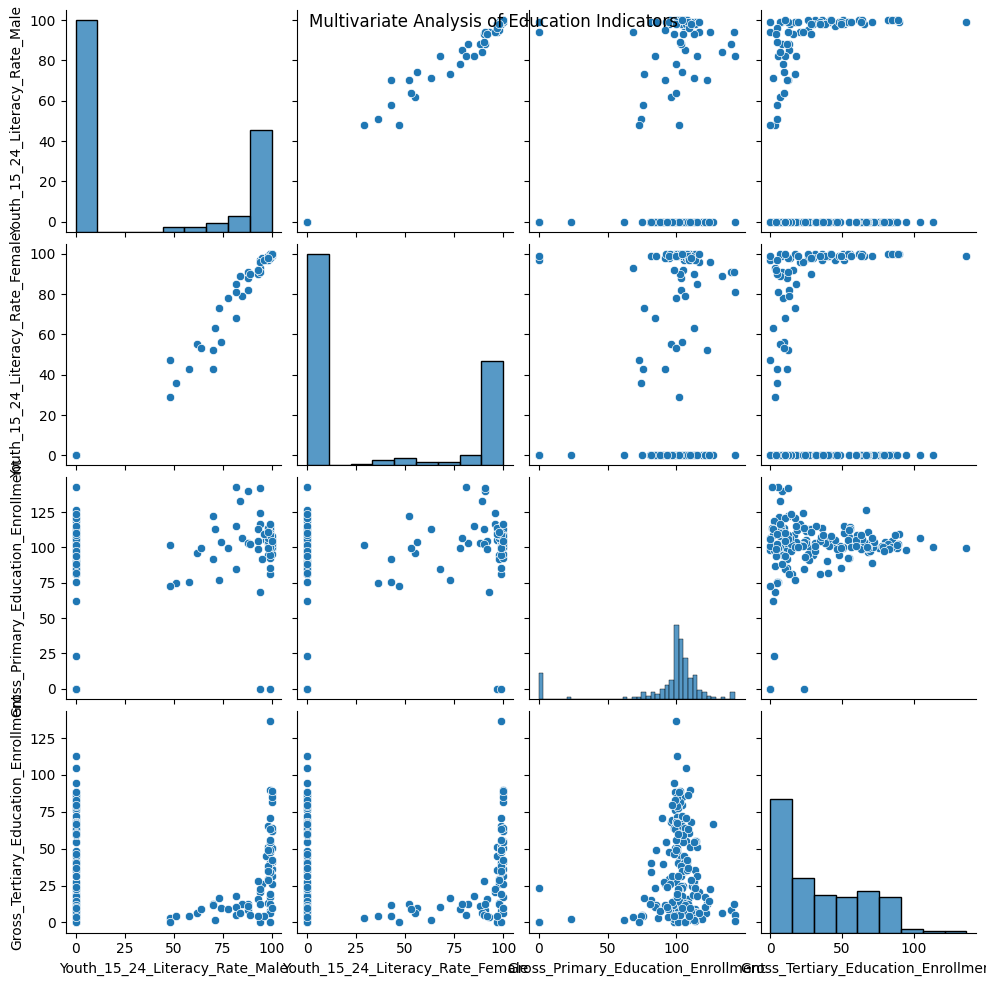

In [23]:
pairplot_columns = ['Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment']
sns.pairplot(data[pairplot_columns])
plt.suptitle('Multivariate Analysis of Education Indicators')
plt.show()


In [24]:
outliers = data[data['OOSR_Pre0Primary_Age_Male'] > data['OOSR_Pre0Primary_Age_Male'].mean() + 3 * data['OOSR_Pre0Primary_Age_Male'].std()]
print("Outlier Countries:")
print(outliers[['Countries and areas', 'OOSR_Pre0Primary_Age_Male']])

Outlier Countries:
    Countries and areas  OOSR_Pre0Primary_Age_Male
199               Yemen                         96


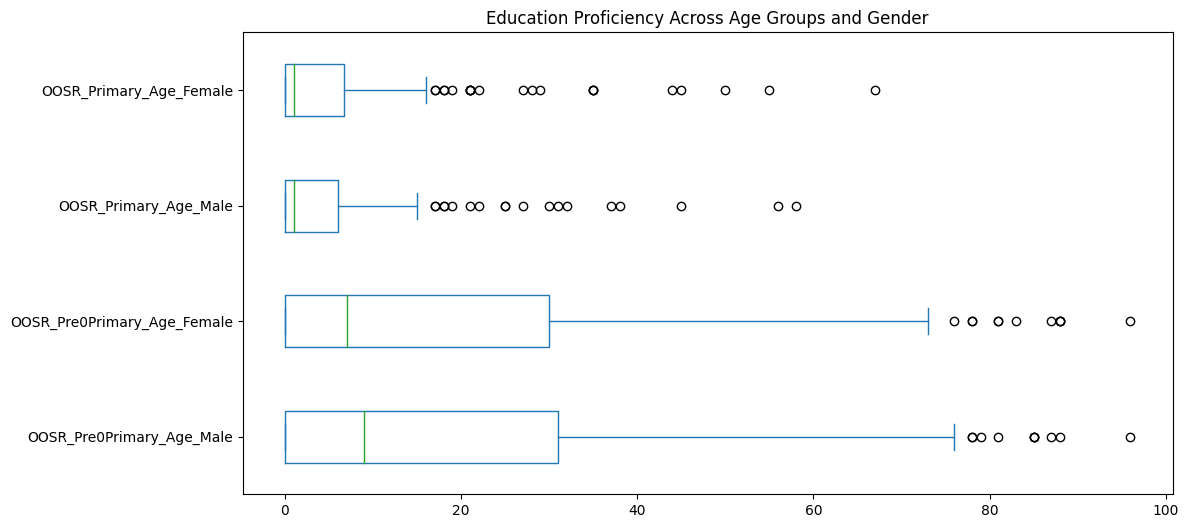

In [25]:
education_proficiency_cols = ['OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female']
data[education_proficiency_cols].plot(kind='box', vert=False, figsize=(12, 6))
plt.title('Education Proficiency Across Age Groups and Gender')
plt.show()


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
data.head()

Countries and areas  Latitude   Longitude  OOSR_Pre0Primary_Age_Male  \
0         Afghanistan  33.939110  67.709953                          0   
1             Albania  41.153332  20.168331                          4   
2             Algeria  28.033886   1.659626                          0   
3             Andorra  42.506285   1.521801                          0   
4              Angola  11.202692  17.873887                         31   

   OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
0                            0                      0   
1                            2                      6   
2                            0                      0   
3                            0                      0   
4                           39                      0   

   OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male  \
0                        0                              0   
1                        3                              6   
2                        0                              0   
3                        0                              0   
4                        0                              0   

   OOSR_Lower_Secondary_Age_Female  OOSR_Upper_Secondary_Age_Male  ...  \
0                                0                             44  ...   
1                                1                             21  ...   
2                                0                              0  ...   
3                                0                              0  ...   
4                                0                              0  ...   

   Primary_End_Proficiency_Reading  Primary_End_Proficiency_Math  \
0                               13                            11   
1                                0                             0   
2                                0                             0   
3                                0                             0   
4                                0                             0   

   Lower_Secondary_End_Proficiency_Reading  \
0                                        0   
1                                       48   
2                                       21   
3                                        0   
4                                        0   

   Lower_Secondary_End_Proficiency_Math  Youth_15_24_Literacy_Rate_Male  \
0                                     0                              74   
1                                    58                              99   
2                                    19                              98   
3                                     0                               0   
4                                     0                               0   

   Youth_15_24_Literacy_Rate_Female  Birth_Rate  \
0                                56       32.49   
1                               100       11.78   
2                                97       24.28   
3                                 0        7.20   
4                                 0       40.73   

   Gross_Primary_Education_Enrollment  Gross_Tertiary_Education_Enrollment  \
0                               104.0                                  9.7   
1                               107.0                                 55.0   
2                               109.9                                 51.4   
3                               106.4                                  0.0   
4                               113.5                                  9.3   

   Unemployment_Rate  
0              11.12  
1              12.33  
2              11.70  
3               0.00  
4               6.89  

[5 rows x 29 columns]

In [28]:
fig = px.scatter(data, x='Countries and areas', y='Unemployment_Rate', color='Unemployment_Rate',
                 title='Unemployment Rates Across Countries')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [29]:
top_10_unemp_rate=data.groupby('Countries and areas')['Unemployment_Rate'].sum().reset_index().sort_values(by='Unemployment_Rate',ascending=False).head(10)

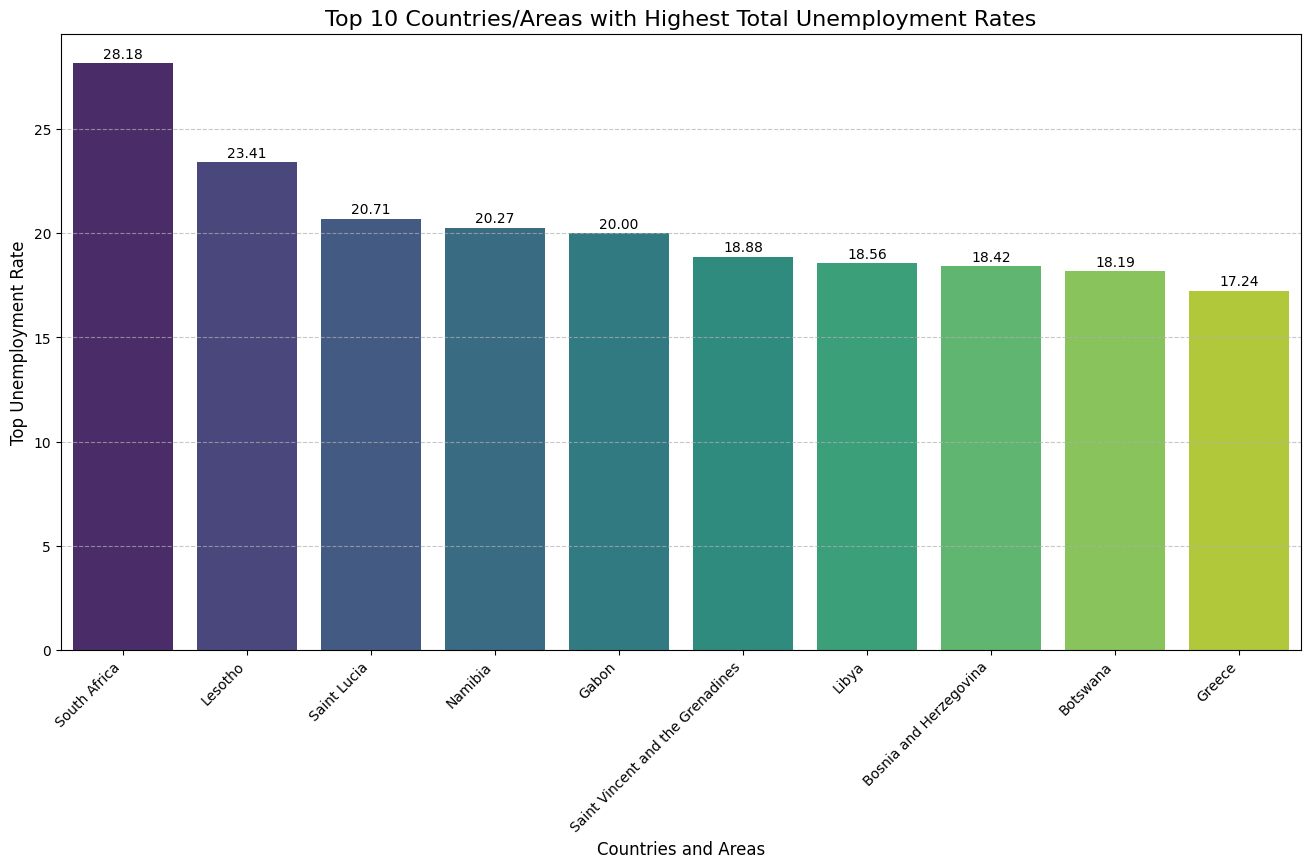

In [30]:
colors = sns.color_palette('viridis', n_colors=len(top_10_unemp_rate))
plt.figure(figsize=(16, 8))
sns.barplot(x='Countries and areas', y='Unemployment_Rate', data=top_10_unemp_rate, palette=colors)
plt.xticks(rotation=45, ha='right')
for i, val in enumerate(top_10_unemp_rate['Unemployment_Rate']):
    plt.text(i, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=10)
plt.xlabel('Countries and Areas', fontsize=12)
plt.ylabel('Top Unemployment Rate', fontsize=12)
plt.title('Top 10 Countries/Areas with Highest Total Unemployment Rates', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
cluster_data = data[education_proficiency_cols]

In [40]:
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)


In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [31]:
education_proficiency_cols = [
    'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female',
    'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female',
    'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female',
    'OOSR_Upper_Secondary_Age_Male'
]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



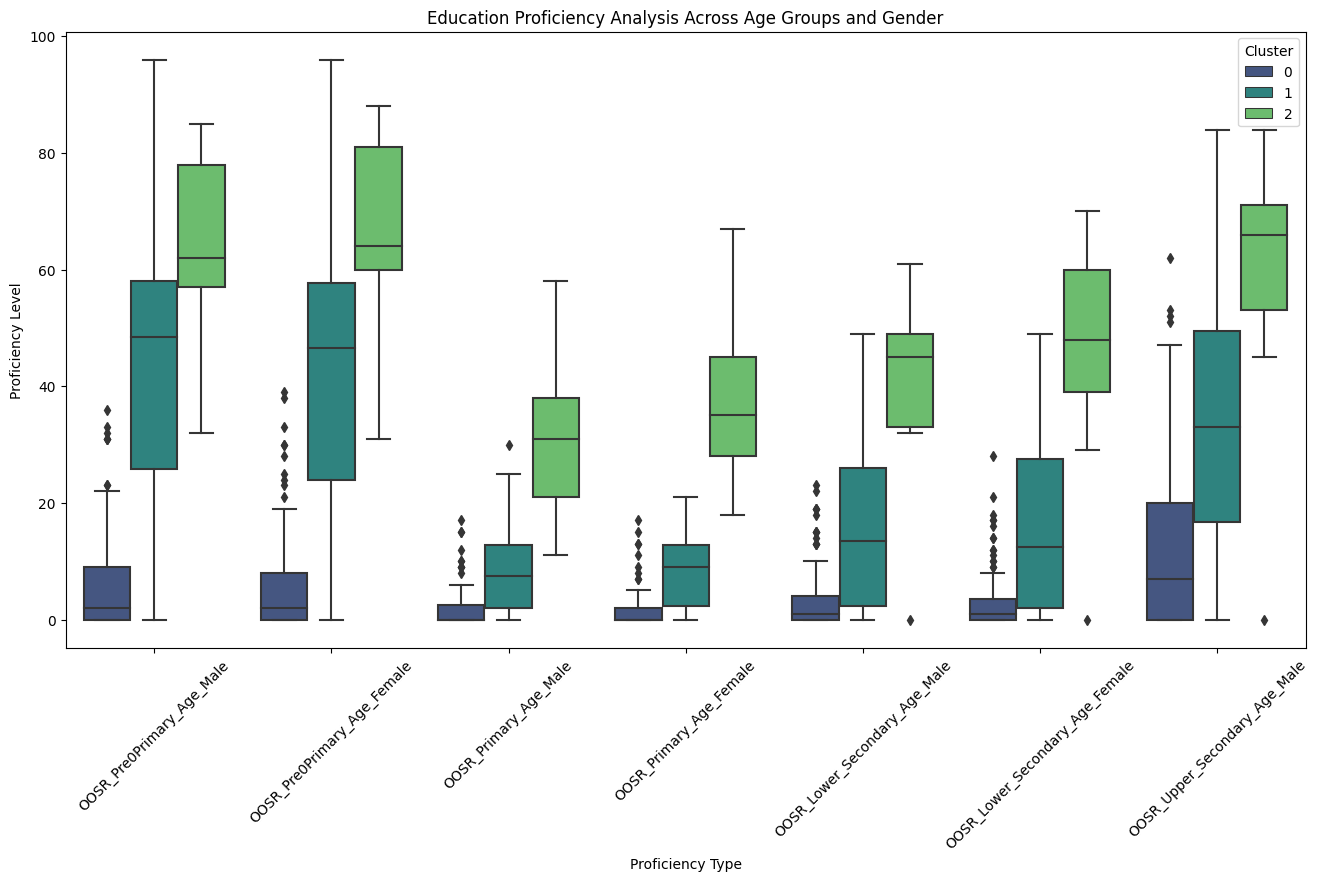

In [42]:
cluster_data = data[education_proficiency_cols]
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)
melted_df = data.melt(id_vars=['Countries and areas', 'Cluster'], value_vars=education_proficiency_cols, var_name='Proficiency_Type', value_name='Proficiency_Level')

plt.figure(figsize=(16, 8))
sns.boxplot(x='Proficiency_Type', y='Proficiency_Level', hue='Cluster', data=melted_df, palette='viridis')
plt.title('Education Proficiency Analysis Across Age Groups and Gender')
plt.xlabel('Proficiency Type')
plt.ylabel('Proficiency Level')
plt.xticks(rotation=45)
plt.show()